# Week 3 handin

# 01 Assignment
http://127.0.0.1:8888/notebooks/05-Exercise.ipynb

# 02 Status


# 03 Solution

In [13]:
import pandas as pd
import requests

fraskildt_url = "https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=F&Tid=2008K1%2C2020K1"

response = requests.get(fraskildt_url)

print(response.headers)

{'Cache-Control': 'no-cache', 'Pragma': 'no-cache', 'Transfer-Encoding': 'chunked', 'Content-Type': 'text/csv; charset=utf-8', 'Expires': '-1', 'Server': 'Microsoft-IIS/10.0', 'StatbankAPI-Request-Id': '189c8dfe-193a-4a4b-b083-563139df4d8b', 'Access-Control-Expose-Headers': 'StatbankAPI-Request-Id', 'Content-Disposition': 'attachment; filename=FOLK1A.csv', 'X-AspNet-Version': '4.0.30319', 'X-Powered-By': 'ASP.NET', 'Date': 'Wed, 03 Mar 2021 14:27:16 GMT'}


In [26]:
# get the filename
fraskildt_fname = response.headers['Content-Disposition'].split('=')[1]
fraskildt_fname = '../data/'+fraskildt_fname
# write content to file (zip file writing bytes)
if response.ok:  # status_code == 200:
    with open(fraskildt_fname, 'wb') as f:
        f.write(response.content)   
print('-----------------')
print('Downloaded {}'.format(fraskildt_fname))

-----------------
Downloaded ../data/FOLK1A.csv


In [46]:
data = pd.read_csv('../data/FOLK1A.csv',  
                   sep = ';')
print(data.columns)

data.head()

Index(['CIVILSTAND', 'TID', 'INDHOLD'], dtype='object')


,CIVILSTAND,TID,INDHOLD
0,Fraskilt,2008K1,428864
1,Fraskilt,2020K1,544588


In [50]:
indhold = data['INDHOLD']
indhold.pct_change()*100


0          NaN
1    26.983846
Name: INDHOLD, dtype: float64

In [55]:

ugift_url = "https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=101%2C751%2C461%2C851%2C561&CIVILSTAND=U%2CTOT&Tid=2020K4"
    
response = requests.get(ugift_url)

ugift_fname = response.headers['Content-Disposition'].split('=')[1]
ugift_fname = '../data/'+ ugift_fname

if response.ok:  
    with open(fraskildt_fname, 'wb') as f:
        f.write(response.content)  
print('-----------------')
print('Downloaded {}'.format(ugift_fname))

data = pd.read_csv('../data/FOLK1A.csv',  
                   sep = ';')
print(data.columns)

data

-----------------
Downloaded ../data/FOLK1A.csv
Index(['OMRÅDE', 'CIVILSTAND', 'TID', 'INDHOLD'], dtype='object')


,OMRÅDE,CIVILSTAND,TID,INDHOLD
0,København,Ugift,2020K4,417782
1,København,I alt,2020K4,637936
2,Aarhus,Ugift,2020K4,211863
3,Aarhus,I alt,2020K4,353445
4,Odense,Ugift,2020K4,113639
5,Odense,I alt,2020K4,205881
6,Aalborg,Ugift,2020K4,120226
7,Aalborg,I alt,2020K4,219310
8,Esbjerg,Ugift,2020K4,55161
9,Esbjerg,I alt,2020K4,115498


In [59]:
ugift = data[data['CIVILSTAND']== 'Ugift']
i_alt = data[data['CIVILSTAND']== 'I alt']
procent = i_alt['INDHOLD'] / ugift['INDHOLD'].sum() * 100
procent

1    69.441182
3    38.473512
5    22.410743
7    23.872529
9    12.572292
Name: INDHOLD, dtype: float64

In [61]:


marritalstatusurl = "https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=101&Tid=2008K1%2C2009K1%2C2010K1%2C2011K1%2C2012K1%2C2013K1%2C2014K1%2C2015K1%2C2016K1%2C2017K1%2C2018K1%2C2019K1%2C2020K1%2C2021K1&CIVILSTAND=U%2CG%2CE%2CF"

    
response = requests.get(marritalstatusurl)

marritalstatus_fname = response.headers['Content-Disposition'].split('=')[1]
marritalstatus_fname = '../data/'+ marritalstatus_fname

if response.ok:  
    with open(marritalstatus_fname, 'wb') as f:
        f.write(response.content)  
print('-----------------')
print('Downloaded {}'.format(marritalstatus_fname))

data = pd.read_csv('../data/FOLK1A.csv',  
                   sep = ';')
print(data.columns)

data

-----------------
Downloaded ../data/FOLK1A.csv
Index(['OMRÅDE', 'TID', 'CIVILSTAND', 'INDHOLD'], dtype='object')


,OMRÅDE,TID,CIVILSTAND,INDHOLD
0,København,2008K1,Ugift,309661
1,København,2008K1,Gift/separeret,128556
2,København,2008K1,Enke/enkemand,21555
3,København,2008K1,Fraskilt,50089
4,København,2009K1,Ugift,317126
5,København,2009K1,Gift/separeret,130995
6,København,2009K1,Enke/enkemand,20600
7,København,2009K1,Fraskilt,49853
8,København,2010K1,Ugift,325562
9,København,2010K1,Gift/separeret,133196


<IPython.core.display.Javascript object>


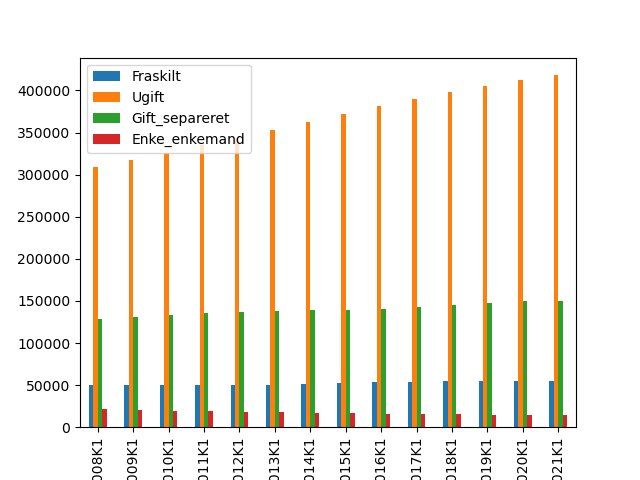

In [76]:
 
Fraskilt = data[data['CIVILSTAND']=='Fraskilt']['INDHOLD'].tolist()
Ugift = data[data['CIVILSTAND']=='Ugift']['INDHOLD'].tolist()
Gift_separeret = data[data['CIVILSTAND']=='Gift/separeret']['INDHOLD'].tolist()
Enke_enkemand = data[data['CIVILSTAND']=='Enke/enkemand']['INDHOLD'].tolist()
Tid = data['TID'][::4].tolist()

dicto = {"Tid":Tid,"Fraskilt":Fraskilt,"Ugift":Ugift,"Gift_separeret":Gift_separeret,"Enke_enkemand":Enke_enkemand}

df = pd.DataFrame(dicto)
df = df.set_index("Tid")

df.plot.bar()

In [78]:
ugiftgifturl = "https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=U%2CG&ALDER=*&Tid=2020K4"

    
response = requests.get(ugiftgifturl)

ugiftgift_fname = response.headers['Content-Disposition'].split('=')[1]
ugiftgift_fname = '../data/'+ ugiftgift_fname

if response.ok:  
    with open(ugiftgift_fname, 'wb') as f:
        f.write(response.content)  
print('-----------------')
print('Downloaded {}'.format(ugiftgift_fname))

data = pd.read_csv('../data/FOLK1A.csv',  
                   sep = ';')
print(data.columns)

data

-----------------
Downloaded ../data/FOLK1A.csv
Index(['CIVILSTAND', 'ALDER', 'TID', 'INDHOLD'], dtype='object')


,CIVILSTAND,ALDER,TID,INDHOLD
0,Ugift,I alt,2020K4,2859116
1,Ugift,0 år,2020K4,61381
2,Ugift,1 år,2020K4,61650
3,Ugift,2 år,2020K4,62532
4,Ugift,3 år,2020K4,61928
...,...,...,...,...
249,Gift/separeret,121 år,2020K4,0
250,Gift/separeret,122 år,2020K4,0
251,Gift/separeret,123 år,2020K4,0
252,Gift/separeret,124 år,2020K4,0


[61381, 61650, 62532, 61928, 62597, 59132, 58528, 59354, 60586, 63442, 66642, 66984, 69063, 67463, 68501, 68110, 68059, 67736, 67886, 70314, 71873, 72919, 73281, 76513, 74894, 76716, 72077, 68725, 64341, 58801, 53898, 48657, 42918, 38418, 35288, 32035, 28768, 26542, 25126, 23939, 23638, 22435, 21848, 20471, 20984, 21246, 19926, 19284, 19343, 18116, 16711, 16501, 16584, 17551, 17493, 16433, 15761, 14757, 13577, 12616, 11951, 11161, 10690, 10048, 9495, 8689, 8074, 7504, 6670, 5928, 5457, 4815, 4407, 4290, 3913, 3277, 2859, 2361, 1973, 1652, 1509, 1382, 1216, 1062, 942, 813, 671, 637, 511, 460, 398, 338, 256, 222, 151, 143, 96, 64, 46, 42, 26, 7, 9, 3, 2, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 13, 74, 231, 575, 1104, 1971, 3323, 5390, 7782, 11080, 14725, 18106, 22054, 24633, 27145, 28876, 30431, 31269, 31867, 32675, 33934, 35034, 37745, 38791, 40136, 39917, 42480, 44804, 44188, 44168, 46608, 45038, 43636, 43729

<IPython.core.display.Javascript object>


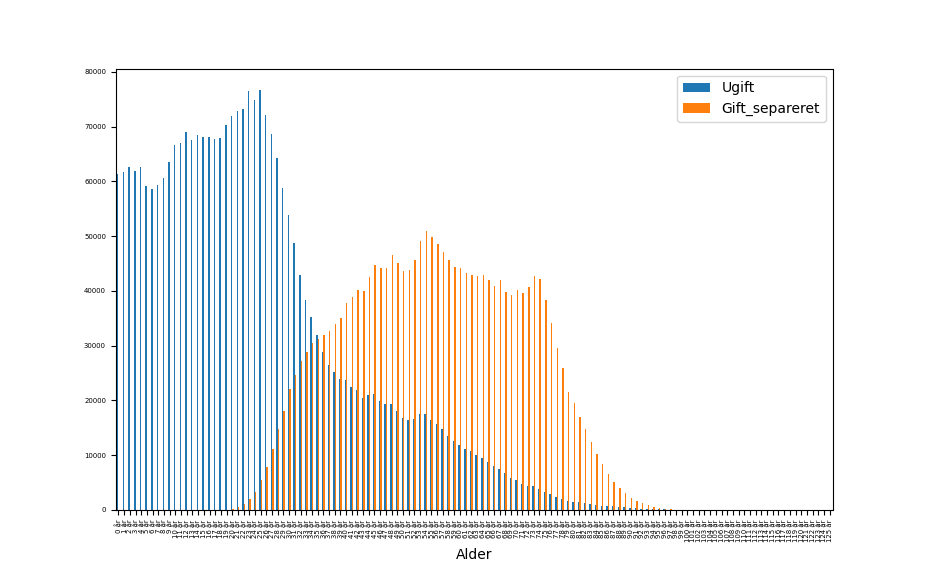

In [104]:
Ugift = data[data['CIVILSTAND']=='Ugift']['INDHOLD']
Ugift = Ugift[1:].tolist()
Gift_separeret = data[data['CIVILSTAND']=='Gift/separeret']['INDHOLD'].tolist()
Gift_separeret = Gift_separeret[1:]
Alder = data['ALDER'][1:127].tolist()

print(Ugift)
print(Gift_separeret)
print(Alder)

dicto = {"Alder":Alder,"Ugift":Ugift,"Gift_separeret":Gift_separeret}

df = pd.DataFrame(dicto)
df = df.set_index("Alder")

df.plot.bar(fontsize=5)